<a href="https://colab.research.google.com/github/ErenzaL/Super-Store-Analysis---python/blob/main/superstore_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS ON SUPERSTORE**

## **Introduction**

Super Store is a small retail business based in the United States. It sells products across three main categories: Furniture, Office Supplies, and Technology. The store serves a wide range of customers, including Consumers, Corporate clients, and Home Offices. The dataset includes detailed information on individual orders, covering sales, profit, and geographic location.

Our task is to determine weak areas and opportunities for Super Store to boost business growth.

**Business Question**
1. Which Category has the highest sales and highest profit?
2. Which Sub-Category has the highest sales and highest profit?
3. Which Product ID or Product Name is the top-selling and most profitable?
4. Which Ship Mode is most frequently used and its profitability?
5. Which Sub-Category has better returning customers?
6. Which City has the most orders?
7. Which City is the most profitable?
8. Which State and Region perform best in sales and profit?
9. Which Customer Segment (Consumer, Corporate, Home Office) is most profitable?
10. How do sales and profit change monthly or quarterly?
11.	How does discount impact sales and profit?
12.	Which discount range yields the best profit-to-sales ratio?
13.	Which sub-categories benefit most from discounts, and which suffer profit erosion?
14. What are the relationships between key numerical variables?

## **Preparing The Environment**
We will import the required libraries and read in the data set.
*   Pandas and numpy - Data manipulation
*   Matplotlib and Seaborn - Data visualisation

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


## Data Exploration

In [ ]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df['Order Date'] =pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df['Order Date'] =pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df['Order Day'] = df["Order Date"].dt.day
df['Order Month'] = df["Order Date"].dt.month
df['Order Year'] = df["Order Date"].dt.year
df['Ship Day'] = df['Ship Date'].dt.day
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship year'] = df['Ship Date'].dt.year

In [ ]:
#descriptive statistics summaries
df.describe(include = 'all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship year
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,...,229.858001,3.789574,0.156203,28.656896,15.468481,7.809686,2015.722233,15.883730,7.743146,2015.737442
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.444000,1.000000,0.000000,-6599.978000,1.000000,1.000000,2014.000000,1.000000,1.000000,2014.000000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,17.280000,2.000000,0.000000,1.728750,8.000000,5.000000,2015.000000,8.000000,5.000000,2015.000000
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,54.490000,3.000000,0.200000,8.666500,15.000000,9.000000,2016.000000,16.000000,9.000000,2016.000000
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,209.940000,5.000000,0.200000,29.364000,23.000000,11.000000,2017.000000,24.000000,11.000000,2017.000000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,22638.480000,14.000000,0.800000,8399.976000,31.000000,12.000000,2017.000000,31.000000,12.000000,2018.000000


## Data Cleaning

In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,8,11,2016,11,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,8,11,2016,11,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,12,6,2016,16,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,11,10,2015,18,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,11,10,2015,18,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,25.2480,3,0.20,4.1028,21,1,2014,23,1,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,91.9600,2,0.00,15.6332,26,2,2017,3,3,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,258.5760,2,0.20,19.3932,26,2,2017,3,3,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,29.6000,4,0.00,13.3200,26,2,2017,3,3,2017


# Exploratory data analysis


## 1. Which Category has the highest sales and highest profit?

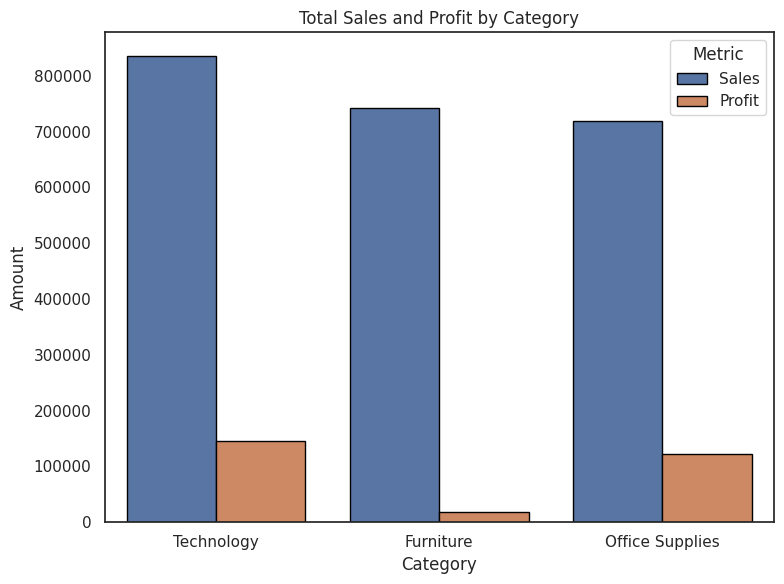

In [ ]:
#1.	Which Category has the highest sales and highest profit?
category_summary = df.groupby('Category')[['Sales','Profit']].agg('sum').reset_index()
category_summary = category_summary.sort_values(by=['Sales', 'Profit'], ascending=False)

category_melted = category_summary.melt(id_vars='Category', value_vars=['Sales', 'Profit'],
                                        var_name='Metric', value_name='Amount')
#
plt.figure(figsize=(8, 6))
sns.set_theme(style="white", palette=None)
sns.barplot(x='Category', y='Amount', hue='Metric', data=category_melted, edgecolor='black')

plt.title('Total Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation = 0 )
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

Business Insights:


1. Technology is your top-performing category in both sales and profit. This category should likely be prioritized in marketing, inventory, and strategic investment.

2. Furniture needs attention: Though it generates substantial sales, its profitability is lacking. Investigate cost structure, pricing strategy, or discounting patterns.

3. Office Supplies may be underrated: Even with lower sales, it delivers decent profit. This could be a niche worth growing further through smart pricing or bundling.

## 2.	Which Sub-Category has the highest sales and highest profit?

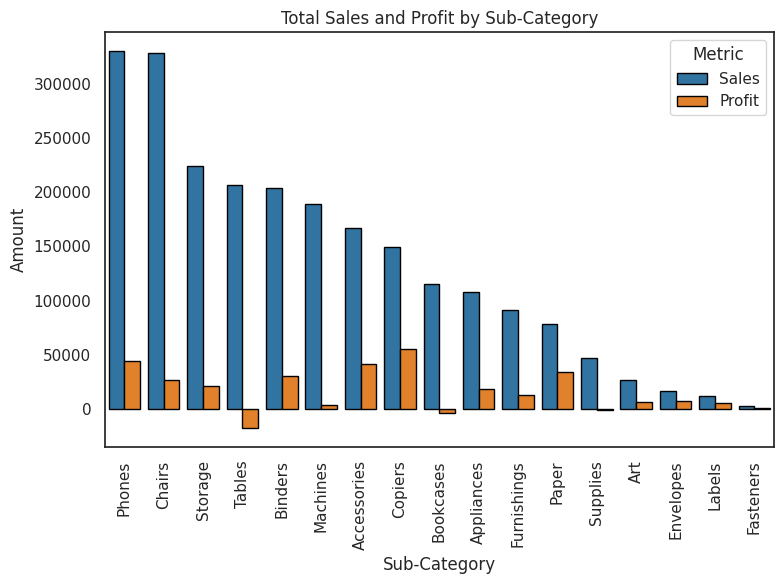

In [ ]:
#2.	Which Sub-Category has the highest sales and highest profit?
sub_category_summary = df.groupby('Sub-Category')[['Sales','Profit']].agg('sum').reset_index()
sub_category_summary = sub_category_summary.sort_values(by=['Sales', 'Profit'], ascending=False)

category_melted = sub_category_summary.melt(id_vars='Sub-Category', value_vars=['Sales', 'Profit'],
                                        var_name='Metric', value_name='Amount')
#visualize
plt.figure(figsize=(8, 6))
sns.set_theme(style="white")
sns.barplot(x='Sub-Category', y='Amount', hue='Metric',palette= 'tab10', data=category_melted, edgecolor='black')

plt.title('Total Sales and Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Amount')
plt.xticks(rotation = 90 )
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

Business Insights:
1. Phones and Copiers are star products: high revenue and/or high profit. Phones should be pushed in volume; Copiers can be promoted as premium-margin products.

2. Chairs and Tables are red flags. Investigate pricing, shipping, returns, and discounts. These are potentially loss leaders or operationally inefficient. These might need either cost cutting or strategic repositioning.  Chairs have high sales but low profit, High revenue but poor profitability suggests cost issues, over-discounting, or inefficiencies.

3. Copiers deserve special attention—they deliver a strong profit with relatively less effort in volume.

4. Consider phasing out or bundling low-volume products like Fasteners or Labels unless they support key product lines.

##3.	Which Product ID or Product Name is the top-selling and most profitable?

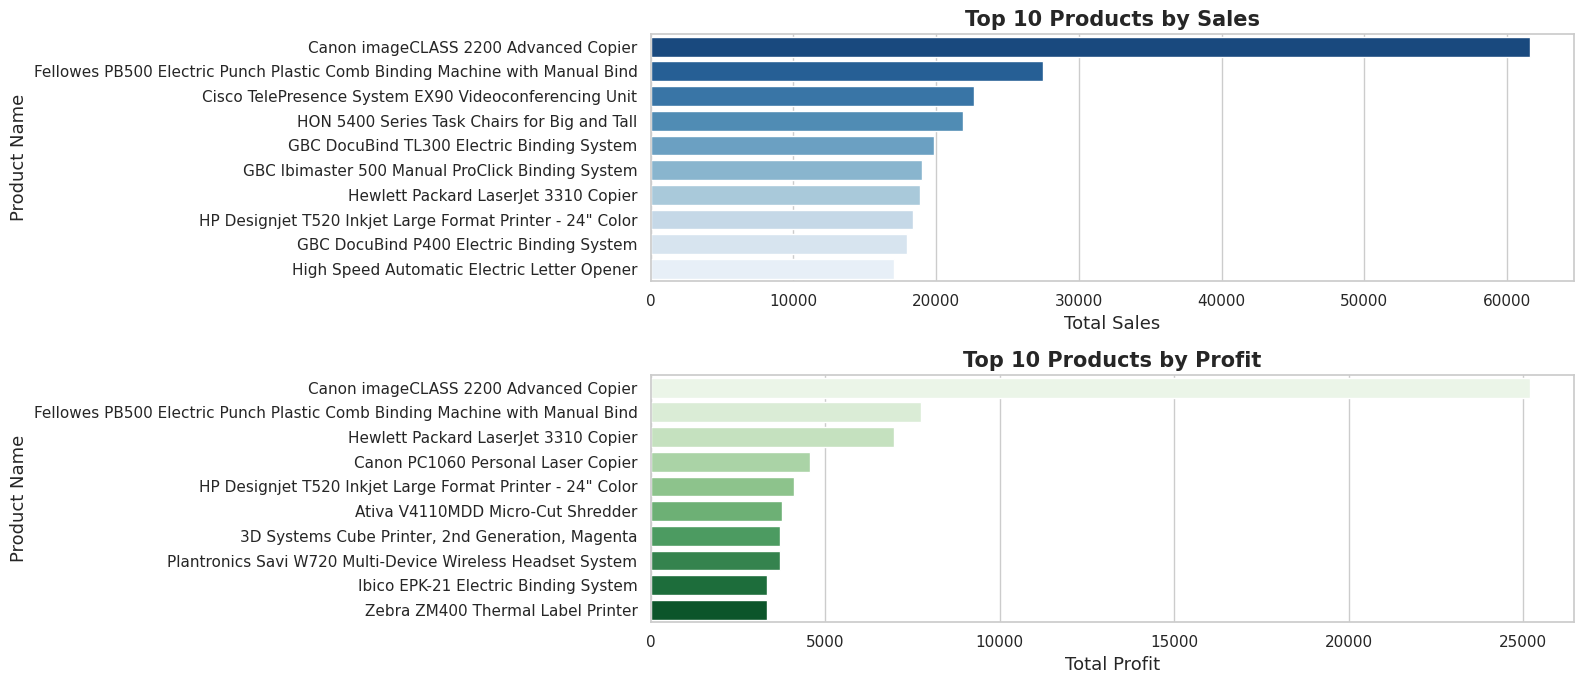

In [ ]:
#3.	Which Product ID or Product Name is the top-selling and most profitable?
# Grouping by Product ID and Product Name to sum Sales and Profit
product_summary = df.groupby(['Product ID', 'Product Name'])[['Sales', 'Profit']].sum().reset_index()

top_10_sales = product_summary.sort_values(by='Sales', ascending=False).head(10)

# Sort and select top 10 by Profit
top_10_profit = product_summary.sort_values(by='Profit', ascending=False).head(10)

# Set theme for clean visuals
sns.set_theme(style="whitegrid")

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(2, 1, figsize=(16, 7))

# Barplot for Top 10 Products by Sales
sns.barplot(
    y='Product Name',
    x='Sales',
    hue = 'Product Name',
    data=top_10_sales,
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 Products by Sales', fontsize=15, weight='bold')
axes[0].set_xlabel('Total Sales', fontsize=13)
axes[0].set_ylabel('Product Name', fontsize=13)

# Barplot for Top 10 Products by Profit
sns.barplot(
    y='Product Name',
    x='Profit',
    hue = 'Product Name',
    data=top_10_profit,
    palette='Greens',
    ax=axes[1]
)
axes[1].set_title('Top 10 Products by Profit', fontsize=15, weight='bold')
axes[1].set_xlabel('Total Profit', fontsize=13)
axes[1].set_ylabel('Product Name', fontsize = 13)

# Improve layout for clarity
plt.tight_layout()

# Show the clean comparative visualization
plt.show()

Business Insights:
1. Canon imageCLASS 2200 is the star product: It tops both sales and profit charts. This product should be central in sales strategy, marketing, and inventory.
2. Profitability ≠ Sales: Some products with high sales (like the Cisco TelePresence System) don't appear in the top profit list, suggesting thin margins or high costs.
3. Look deeper into outliers: Products like Ibico EPK-21 or Zebra ZM400 may not be high in sales but appear in profit rankings—consider promoting these as niche, high-margin options.
4. Sales-only focus could mislead: It’s clear that not all best-sellers are the most profitable. A combined view like this is essential to guide decisions.

##4.	Which Ship Mode is most frequently used?

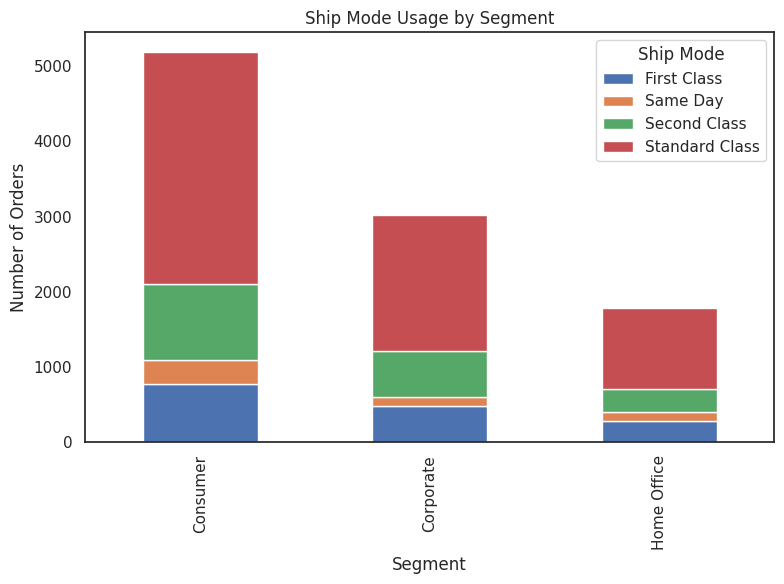

In [ ]:
#4.	Which Ship Mode is most frequently used?
ship_by_segment = pd.crosstab(df['Segment'], df['Ship Mode'])
ship_by_segment.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Ship Mode Usage by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Orders')
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()

Business Insight:
1. Standard Class dominates, suggesting that customers prefer lower-cost or default shipping options.

2. There's an opportunity to:
    * Promote faster delivery upgrades (First Class, Same Day) to increase revenue.
    * Analyze if Standard Class delays affect satisfaction, especially for Consumer segment.

3. Since Same Day is rarely used, consider whether it's under-marketed or just unnecessary for most product types.

##5.	Which Sub-Category has better returning customers?

   Sub-Category  Total_Customers  Repeat_Customers  Repeat Rate (%)
0         Paper              611               397        64.975450
1       Binders              650               409        62.923077
2   Furnishings              528               256        48.484848
3        Phones              511               238        46.575342
4   Accessories              474               209        44.092827
5       Storage              514               225        43.774319
6           Art              494               212        42.914980
7        Chairs              407               142        34.889435
8        Labels              281                71        25.266904
9    Appliances              356                86        24.157303
10    Envelopes              206                41        19.902913
11       Tables              261                48        18.390805
12    Bookcases              195                30        15.384615
13     Supplies              160                

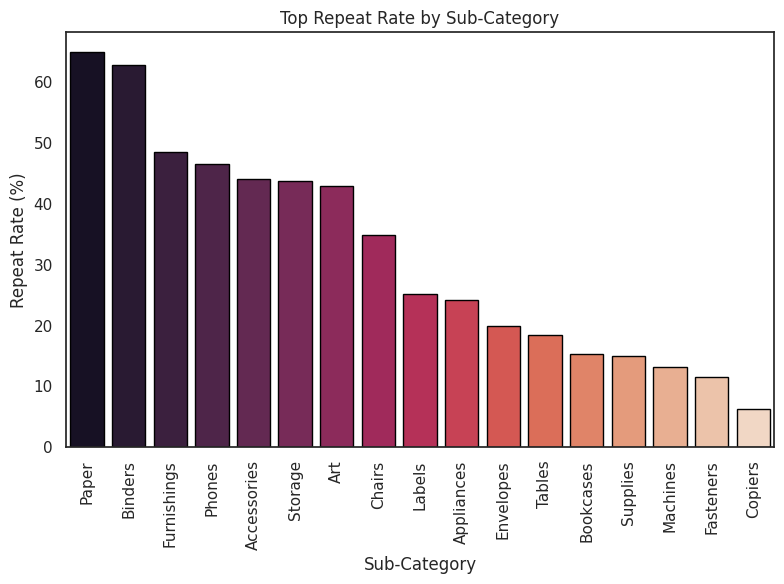

In [ ]:
#5.	Which Sub-Category has better returning customers?
# Group by Sub-Category and Customer ID, counting orders per customer per sub-category
subcat_cust_orders = df.groupby(['Sub-Category', 'Customer ID']).size().reset_index(name='Order Count')

# Mark as repeat customer if they have ordered >= 2 times in that sub-category
subcat_cust_orders['Is Repeat in Subcat'] = subcat_cust_orders['Order Count'] > 1

# Calculate:
# - total unique customers per sub-category
# - total repeat customers per sub-category
repeat_summary = (
    subcat_cust_orders.groupby('Sub-Category')
    .agg(Total_Customers=('Customer ID', 'nunique'),
         Repeat_Customers=('Is Repeat in Subcat', 'sum'))
    .reset_index()
)

# Calculate repeat rate
repeat_summary['Repeat Rate (%)'] = (repeat_summary['Repeat_Customers'] / repeat_summary['Total_Customers']) * 100

# Sort descending to find the sub-categories with the highest repeat rate
repeat_summary = repeat_summary.sort_values(by='Repeat Rate (%)', ascending=False).reset_index(drop=True)
print(repeat_summary)

#visualize
plt.figure(figsize=(8, 6))
sns.set_theme(style="white")
sns.barplot(x='Sub-Category', y='Repeat Rate (%)', data=repeat_summary, edgecolor='black', hue ='Sub-Category', palette = 'rocket')
plt.title('Top Repeat Rate by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Repeat Rate (%)')
plt.xticks(rotation = 90 )
plt.tight_layout()
plt.show()

Business Insight:
1. Paper and Binders are your best categories for customer retention. These can be leveraged for:
    * Loyalty campaigns
    * Subscription models
    * Auto-reorder offers

2. High repeat rate ≠ high profit: For example, Paper has a high repeat rate but may not be as profitable. This is where volume matters more than margin.

3. Super Store should ensure inventory is always well-stocked for top-selling and high-repeat sub-categories such as Binders, Paper, Furnishings, and Phones. These are essential for sustaining customer loyalty and meeting consistent demand.

4. Despite being most profitable, Low repeat categories (e.g., Copiers) may not need customer retention efforts. Instead, focus on upsell strategies (e.g., maintenance packages, accessories).

##6. Which City has the most orders?

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: Order ID, dtype: int64


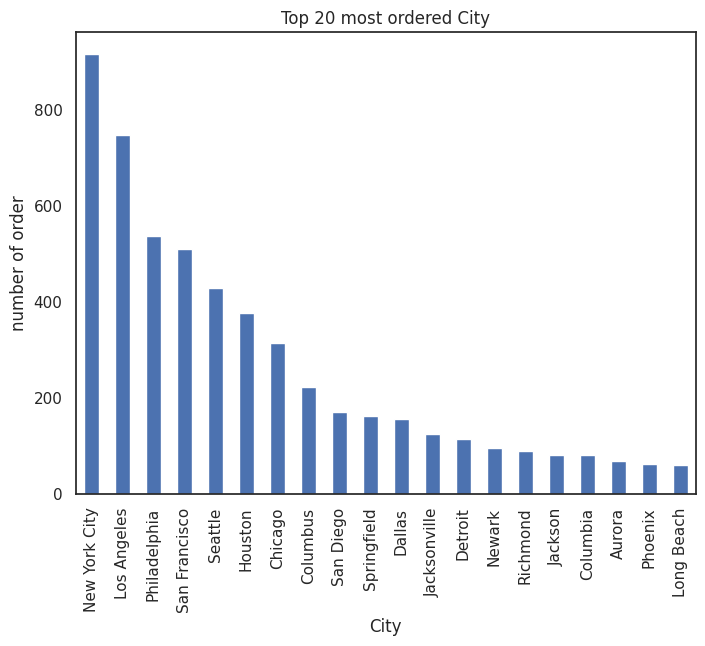

In [ ]:
#6. Which City has the most orders?
most_ordered_city = df.groupby('City')['Order ID'].agg('count').sort_values(ascending=False)
most_ordered_city_top20 = most_ordered_city.head(20)
print(most_ordered_city_top20)
plt.figure(figsize = (8,6))
sns.set_theme(style = 'white')
most_ordered_city_top20.plot(kind = 'bar')
plt.title('Top 20 most ordered City')
plt.xlabel('City')
plt.ylabel('number of order')
plt.xticks(rotation = 90)
plt.show()

Business Insight:
1. New York City and Los Angeles should be priority hubs for logistics and marketing, as they drive the highest volume of orders.

2. Inventory placement and delivery optimization in top 5 cities (e.g., NY, LA, Philly, SF, Seattle) can reduce delivery time and cost.

3. Super Store should ensure inventory is always well-stocked for top-selling and high-repeat sub-categories such as Binders, Paper, Furnishings, and Phones, especially in high-order cities like New York and Los Angeles.

4. Consider investigating customer behavior in mid-tier cities (e.g., Chicago, Columbus) to identify growth opportunities.

5. The long tail of cities can be targeted with localized marketing or regional warehousing to improve reach and responsiveness.

##7.	Which City is the most profitable?

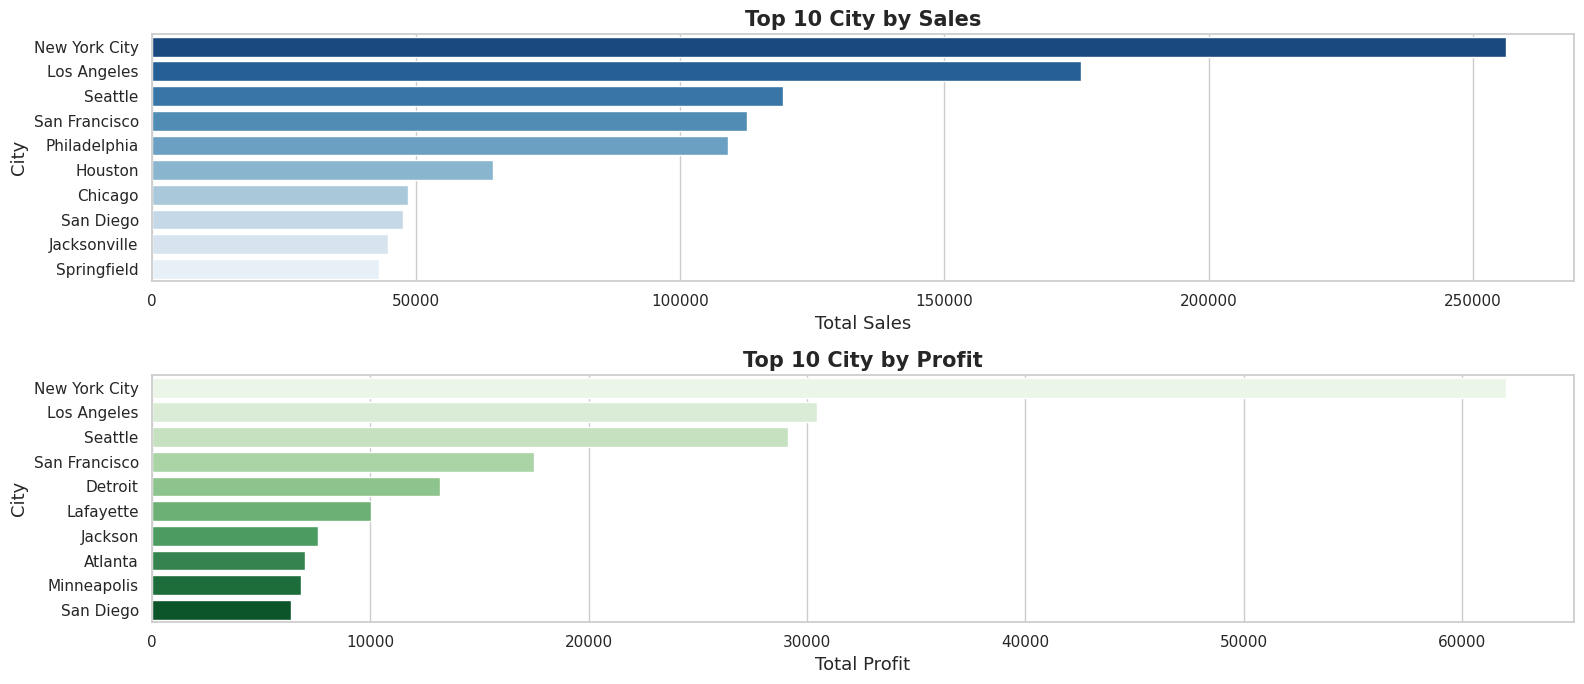

In [ ]:
#7.	Which City is the most profitable?
# Grouping by Product ID and Product Name to sum Sales and Profit
city_sales_summary = df.groupby(['City'])[['Sales', 'Profit']].sum().reset_index()

# Finding the top-selling city
top_selling_city = city_sales_summary.loc[city_sales_summary['Sales'].idxmax()]

# Finding the most profitable city
top_profitable_city = city_sales_summary.loc[city_sales_summary['Profit'].idxmax()]

# Prepare a clear, concise summary for user direct learning and note-taking
top_selling_city, top_profitable_city

top_10_sales = city_sales_summary.sort_values(by='Sales', ascending=False).head(10)

# Sort and select top 10 by Profit
top_10_profit = city_sales_summary.sort_values(by='Profit', ascending=False).head(10)

# Set theme for clean visuals
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(16, 7))
# Barplot for Top 10 Products by Sales
sns.barplot(
    y='City',
    x='Sales',
    data=top_10_sales,
    hue = 'City',
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 City by Sales', fontsize=15, weight='bold')
axes[0].set_xlabel('Total Sales', fontsize=13)
axes[0].set_ylabel('City', fontsize=13)

# Barplot for Top 10 Products by Profit
sns.barplot(
    y='City',
    x='Profit',
    data=top_10_profit,
    hue = 'City',
    palette='Greens',
    ax=axes[1]
)
axes[1].set_title('Top 10 City by Profit', fontsize=15, weight='bold')
axes[1].set_xlabel('Total Profit', fontsize=13)
axes[1].set_ylabel('City', fontsize = 13)

# Improve layout for clarity
plt.tight_layout()

# Show the clean comparative visualization
plt.show()

Business Insight:
1. New York City is the undisputed top performer across the board:
    * It ranks #1 in total orders, total sales, and total profit.
    * This city should be treated as a strategic hub for marketing investment, inventory optimization, and premium service offerings.

2. Los Angeles, Seattle, and San Francisco consistently appear in the top 5 across orders, sales, and profit, indicating well-rounded and profitable demand.Prioritize regional logistics, ad spend, and fast delivery options in these areas.

3. Philadelphia, Houston, and Chicago show high order volumes but slightly lower profit, which could suggest margin pressure. Investigate discounting, product mix, or shipping costs in these cities.

4. Cities like Detroit, Lafayette, Jackson, and Minneapolis do not appear in the top 10 orders or sales, yet they rank high in profit.These are low-volume, high-margin markets, ideal for targeted promotions or premium product launches.

## 8.	Which State and Region is the most profitable?

In [ ]:
#8.	Which State and Region is the most profitable?
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


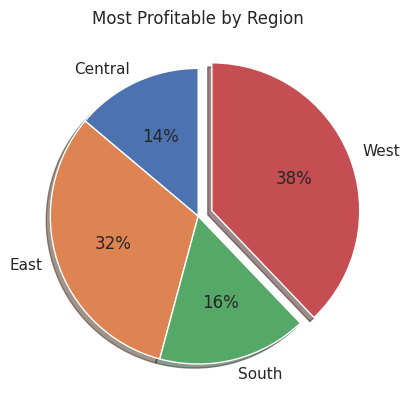

In [ ]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]

plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")

plt.show()

Business Insight:

West Region contributes the highest share of total profit (38%), followed by East (32%), South (16%), and Central (14%).

The West should be viewed as the profit powerhouse, deserving resource concentration and premium inventory.

The Central region, while lagging in profit, may benefit from operational review or product mix adjustments.

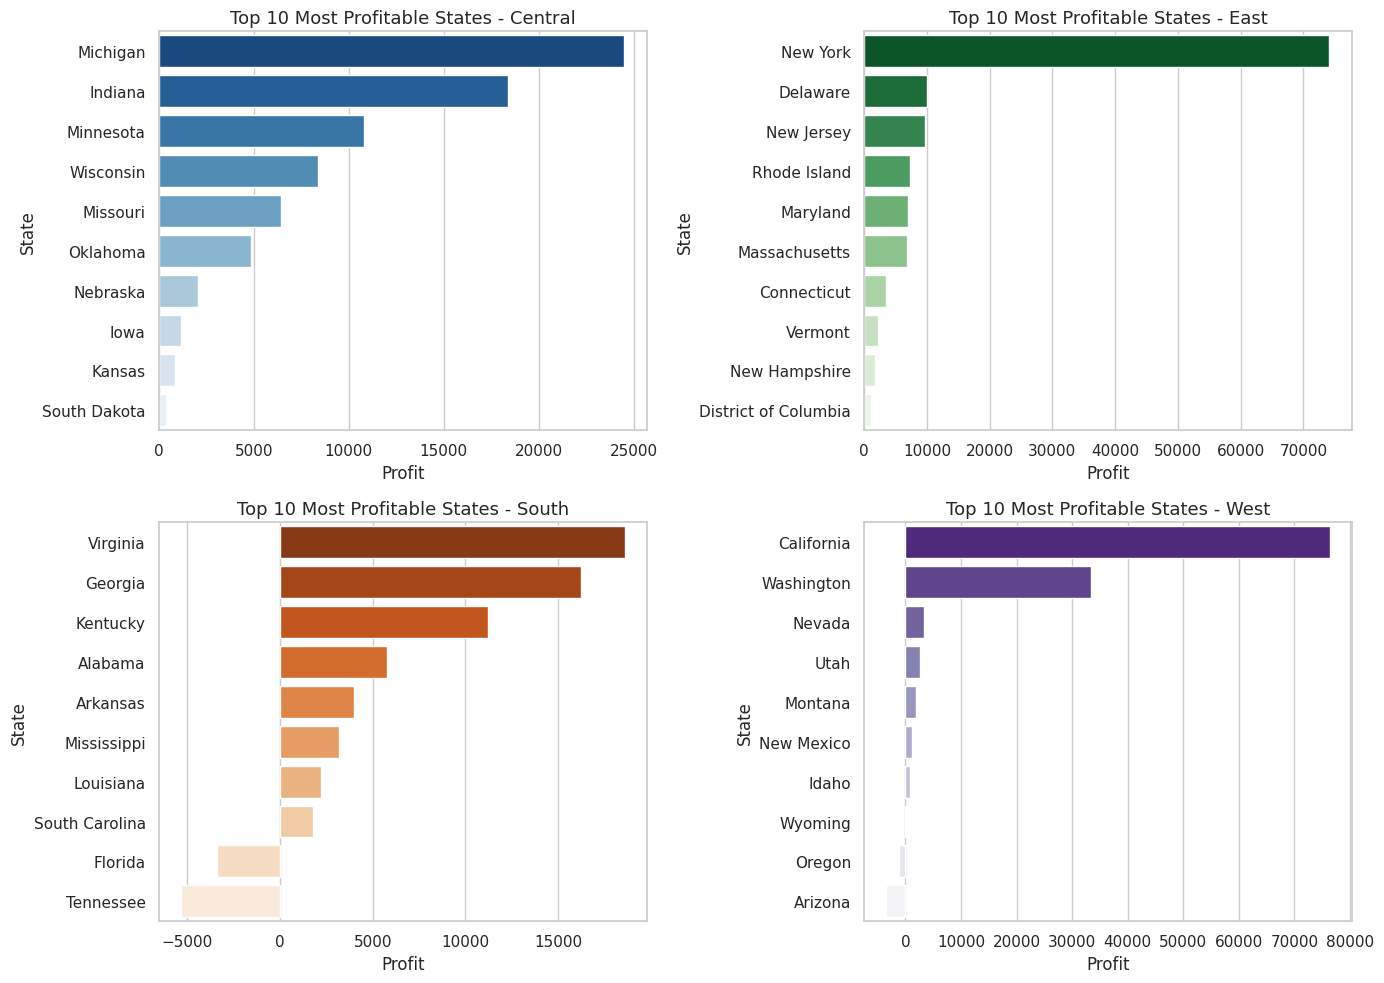

In [ ]:
#top most profitable state from each region
# Group by Region and State, summing Profit
state_profit = df.groupby(['Region', 'State'])['Profit'].sum().reset_index()

# Create separate DataFrames by filtering on Region
state_profit_central = state_profit[state_profit['Region'] == 'Central'].reset_index(drop=True).sort_values(by='Profit', ascending=False).head(10)
state_profit_east = state_profit[state_profit['Region'] == 'East'].reset_index(drop=True).sort_values(by='Profit', ascending=False).head(10)
state_profit_south = state_profit[state_profit['Region'] == 'South'].reset_index(drop=True).sort_values(by='Profit', ascending=False).head(10)
state_profit_west = state_profit[state_profit['Region'] == 'West'].reset_index(drop=True).sort_values(by='Profit', ascending=False).head(10)

# Set seaborn style
sns.set_theme(style="whitegrid")

# Map region names to their DataFrames
region_dict = {
    'Central': state_profit_central,
    'East': state_profit_east,
    'South': state_profit_south,
    'West': state_profit_west
}

#Set different palettes for each region for visual clarity
palette_dict = {
    'Central': 'Blues_r',
    'East': 'Greens_r',
    'South': 'Oranges_r',
    'West': 'Purples_r'
}

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define region order for consistent placement
regions = ['Central', 'East', 'South', 'West']

# Use a loop to plot each region
for ax, region in zip(axes.flatten(), regions):
    sns.barplot(
        data=region_dict[region],
        x='Profit',
        y='State',
        ax=ax,
        hue = 'State',
        palette=palette_dict[region]
    )
    ax.set_title(f'Top 10 Most Profitable States - {region}', fontsize=13)
    ax.set_xlabel('Profit')
    ax.set_ylabel('State')

# Adjust layout
plt.tight_layout()
plt.show()


Business Insight:
1. California (West) and New York (East) are the most profitable states in their respective regions.
    * These two states alone dominate regional profitability and should guide logistics hub planning.

2. In the South, Virginia and Georgia lead in profitability, while in Central, Michigan and Indiana are top performers.
    * These state-level insights can inform geo-targeted marketing and state-specific discount strategies.

##9.	Which Customer Segment (Consumer, Corporate, Home Office) is most profitable?

In [ ]:
#9.	Which Customer Segment (Consumer, Corporate, Home Office) is most profitable?
segment_analysis = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


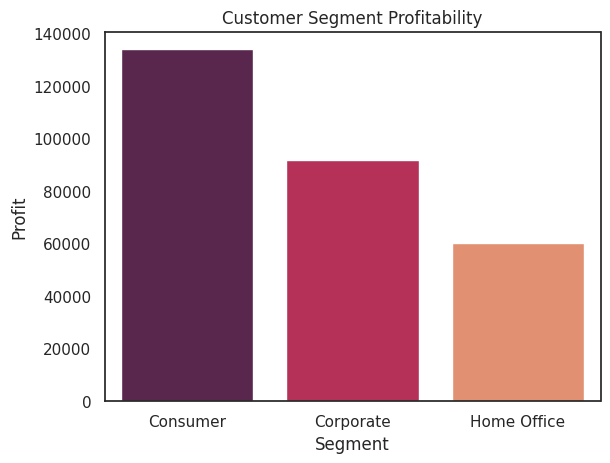

In [ ]:
# Plot Bar Plot
sns.set_theme(style="white")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit,hue =segment_analysis.index, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

Business Insight:

1. The Consumer segment should be the primary focus for growth, retention, and campaign strategies. It brings in the largest share of profit, making it the most valuable customer base.

2. Invest in personalized promotions, membership perks, and repeat purchase incentives to further deepen engagement with Consumer customers.

3. The Corporate segment, while second, still holds significant value. Consider launching B2B bundles, business loyalty programs, or bulk order benefits to grow this segment's contribution.

4. Home Office customers represent an underperforming group in terms of profitability. Explore strategies to: Reposition product offerings to better suit home professionals, Or consolidate logistics and marketing efforts to improve cost-efficiency when serving this segment.



## 10. How do sales and profit change monthly or quarterly?

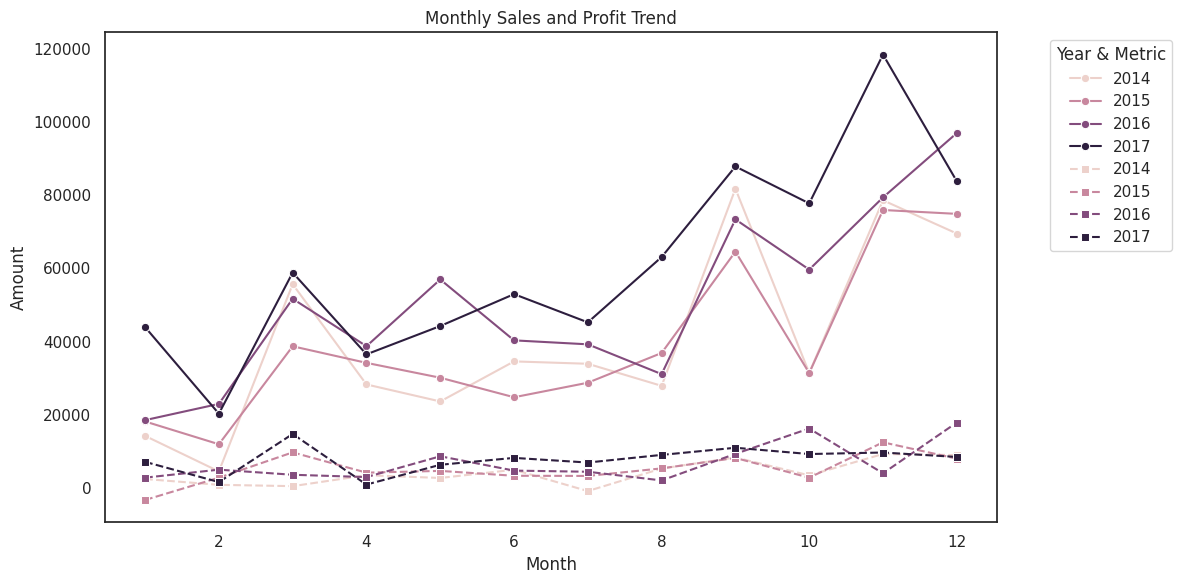

In [ ]:
#10. How do salesand profit change monthly or quarterly?

monthly_trend = (
    df.groupby(['Order Year', 'Order Month'])[['Sales', 'Profit']]
    .sum()
    .reset_index()
    .sort_values(['Order Year', 'Order Month'])
)

# --- Monthly Plot ---
sns.set_theme(style="white")
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='Order Month', y='Sales', hue='Order Year', marker='o')
sns.lineplot(data=monthly_trend, x='Order Month', y='Profit', hue='Order Year', marker='s', linestyle='--')
plt.title('Monthly Sales and Profit Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend(title='Year & Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Monthly sales trend
df['Month_year']= df['Order Date'].dt.to_period('M') #extracting month and year from order date
Monthly_sale=df.groupby('Month_year')['Sales'].sum().reset_index()
print(Monthly_sale)

   Month_year        Sales
0     2014-01   14236.8950
1     2014-02    4519.8920
2     2014-03   55691.0090
3     2014-04   28295.3450
4     2014-05   23648.2870
5     2014-06   34595.1276
6     2014-07   33946.3930
7     2014-08   27909.4685
8     2014-09   81777.3508
9     2014-10   31453.3930
10    2014-11   78628.7167
11    2014-12   69545.6205
12    2015-01   18174.0756
13    2015-02   11951.4110
14    2015-03   38726.2520
15    2015-04   34195.2085
16    2015-05   30131.6865
17    2015-06   24797.2920
18    2015-07   28765.3250
19    2015-08   36898.3322
20    2015-09   64595.9180
21    2015-10   31404.9235
22    2015-11   75972.5635
23    2015-12   74919.5212
24    2016-01   18542.4910
25    2016-02   22978.8150
26    2016-03   51715.8750
27    2016-04   38750.0390
28    2016-05   56987.7280
29    2016-06   40344.5340
30    2016-07   39261.9630
31    2016-08   31115.3743
32    2016-09   73410.0249
33    2016-10   59687.7450
34    2016-11   79411.9658
35    2016-12   96999.0430
3

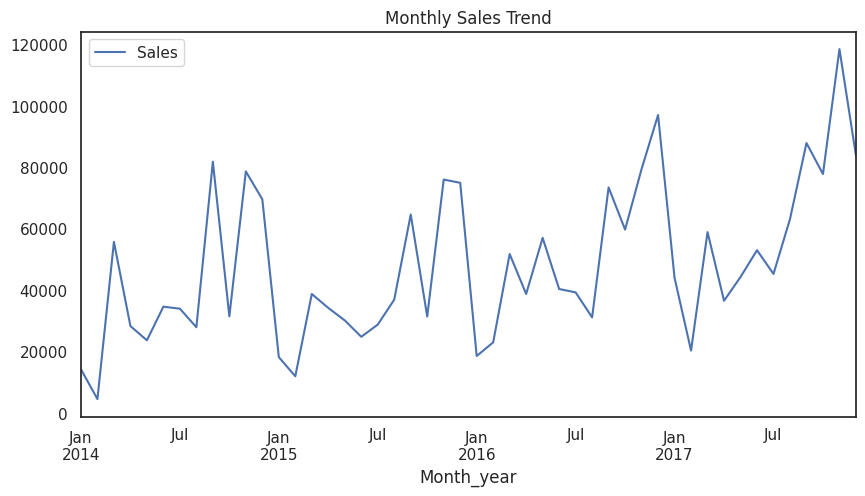

In [ ]:
Monthly_sale.plot(x='Month_year',y='Sales',kind='line',figsize=(10,5))
plt.title('Monthly Sales Trend')
plt.show()

 Business Insight
1. Super Store’s sales are heavily seasonal, with the most revenue generated in October–December (Q4).
    * Inventory, workforce, and marketing spend should be strategically ramped up before Q4 to capitalize on this demand.

2. Despite higher Q4 sales, profit doesn’t increase proportionally, likely due to heavy discounting or increased operational costs during that time.
    * The business should explore ways to protect margin during promotional periods — e.g., bundling, selective discounting, or upselling.

3. Over time, the sales trend is clearly upward, signaling healthy growth.
    * However, the volatility implies a need for better demand forecasting and more agile inventory planning to handle surges and slumps.

## 11. How does discount impact sales and profit?

          Discount     Sales    Profit
Discount  1.000000 -0.028190 -0.219487
Sales    -0.028190  1.000000  0.479064
Profit   -0.219487  0.479064  1.000000


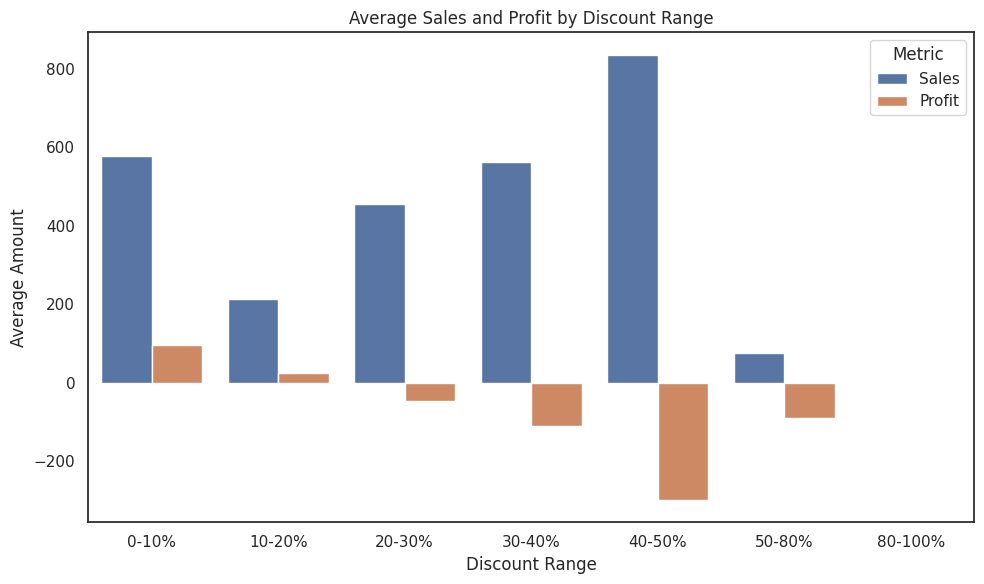

In [ ]:
#11.How does discount impact sales and profit?
# Correlation check
print(df[['Discount', 'Sales', 'Profit']].corr())

#Create discount bins to analyze ranges
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-80%', '80-100%']
df['Discount Range'] = pd.cut(df['Discount'], bins=bins, labels=labels)

#Group by discount range
discount_analysis = df.groupby('Discount Range')[['Sales', 'Profit']].mean().reset_index()
discount_analysis['Transaction Count'] = df.groupby('Discount Range').size().values

#Melt for easier barplot
melted = discount_analysis.melt(id_vars='Discount Range', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Amount')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Discount Range', y='Amount', hue='Metric')
plt.title('Average Sales and Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Amount')
plt.tight_layout()
plt.show()

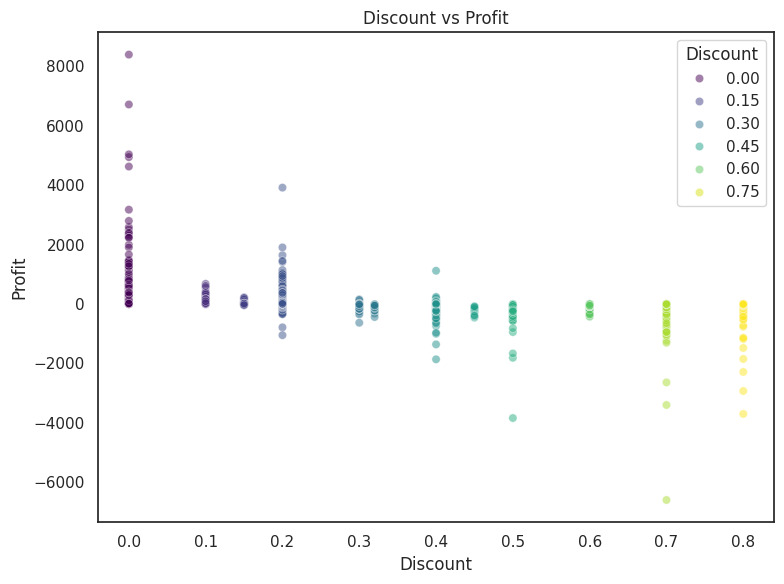

In [ ]:
#scatter plot between discount rate and Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5, hue = 'Discount', palette = 'viridis')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

Business Insight:
1. Discounting is not an effective strategy for boosting profit. While it may slightly increase sales, the loss in profit outweighs the gain.The optimal discount range for balancing sales and profit appears to be 0–10%.

2. Heavy discounting (>30%) should be:
    * Avoided unless part of a strategic clearance campaign.
    * Used selectively, not broadly across products.

3. Consider alternative promotions:
    * Bundle deals, loyalty points, or exclusive member perks — to drive volume without heavy discounting.

4. Super Store should monitor discount sensitivity by product category, as some may handle markdowns better than others.



## 12. Which discount range yields the best profit-to-sales ratio?

In [ ]:
#12. Which discount range yields the best profit-to-sales ratio?
# Calculate profit-to-sales ratio by discount range
discount_ratio = (df.groupby('Discount Range')[['Sales', 'Profit']].sum() .reset_index())

# Calculate Profit-to-Sales Ratio (%)
discount_ratio['Profit-to-Sales Ratio (%)'] = (discount_ratio['Profit'] / discount_ratio['Sales']) * 100

# Sort by Profit-to-Sales Ratio descending
discount_ratio_sorted = discount_ratio.sort_values(by='Profit-to-Sales Ratio (%)', ascending=False)
discount_ratio_sorted

,Discount Range,Sales,Profit,Profit-to-Sales Ratio (%)
0,0-10%,54369.3510,9029.1770,16.607108
1,10-20%,792152.8895,91756.2975,11.583155
2,20-30%,103226.6550,-10369.2774,-10.045155
3,30-40%,130911.2428,-25448.1881,-19.439269
4,40-50%,64403.5140,-22999.5392,-35.711622
5,50-80%,64228.7380,-76559.0513,-119.197502
6,80-100%,0.0000,0.0000,NaN


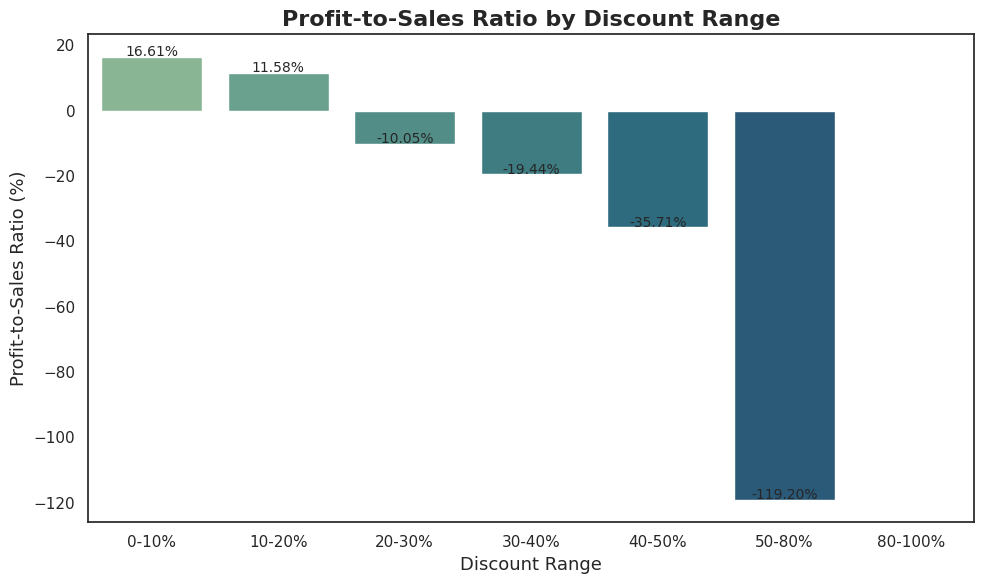

In [ ]:
sns.set_theme(style="white")

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=discount_ratio_sorted,
    x='Discount Range',
    y='Profit-to-Sales Ratio (%)',
    palette='crest'
)

# Add titles and labels
plt.title('Profit-to-Sales Ratio by Discount Range', fontsize=16, weight='bold')
plt.xlabel('Discount Range', fontsize=13)
plt.ylabel('Profit-to-Sales Ratio (%)', fontsize=13)

# Annotate bars with exact values
for index, row in discount_ratio_sorted.iterrows():
    plt.text(
        x=index,
        y=row['Profit-to-Sales Ratio (%)'] + 0.2,
        s=f"{row['Profit-to-Sales Ratio (%)']:.2f}%",
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

Business Insight:
1. The best-performing discount range is 0–10%, achieving the highest profit-to-sales efficiency (16.6%).

2. Slight discounts (10–20%) can still be effective in driving volume while preserving margin — useful for targeted promos.

3. Beyond 20%, discounts result in negative profitability, with 50–80% being financially harmful.

4. Despite high sales in the 40–50% discount range (from previous charts), it has a −35.7% profit-to-sales ratio, confirming it's unsustainable.

5. Super Store should:

    * Cap general discounts at 20%, ideally below 10% for most products.
    * Use deep discounts only for clearance, expiring stock, or customer win-back cases — not for standard campaigns.


## 13.	Which sub-categories benefit most from discounts, and which suffer profit erosion?

In [ ]:
#13. Which sub-categories benefit most from discounts, and which suffer profit erosion?
# Get unique sub-categories
subcats = df['Sub-Category'].unique()

# Store results
results = []

# Loop through each sub-category
for subcat in subcats:
    temp = df[df['Sub-Category'] == subcat]
    corr = temp['Discount'].corr(temp['Profit'])
    results.append({'Sub-Category': subcat, 'Discount-Profit Correlation': corr})

# Create DataFrame
discount_profit_corr = pd.DataFrame(results).sort_values(by='Discount-Profit Correlation', ascending=False).reset_index(drop=True)
discount_profit_corr

,Sub-Category,Discount-Profit Correlation
0,Labels,-0.132661
1,Fasteners,-0.171133
2,Paper,-0.172494
3,Envelopes,-0.184235
4,Binders,-0.238195
5,Accessories,-0.244192
6,Art,-0.251636
7,Supplies,-0.253066
8,Copiers,-0.356122
9,Storage,-0.364029


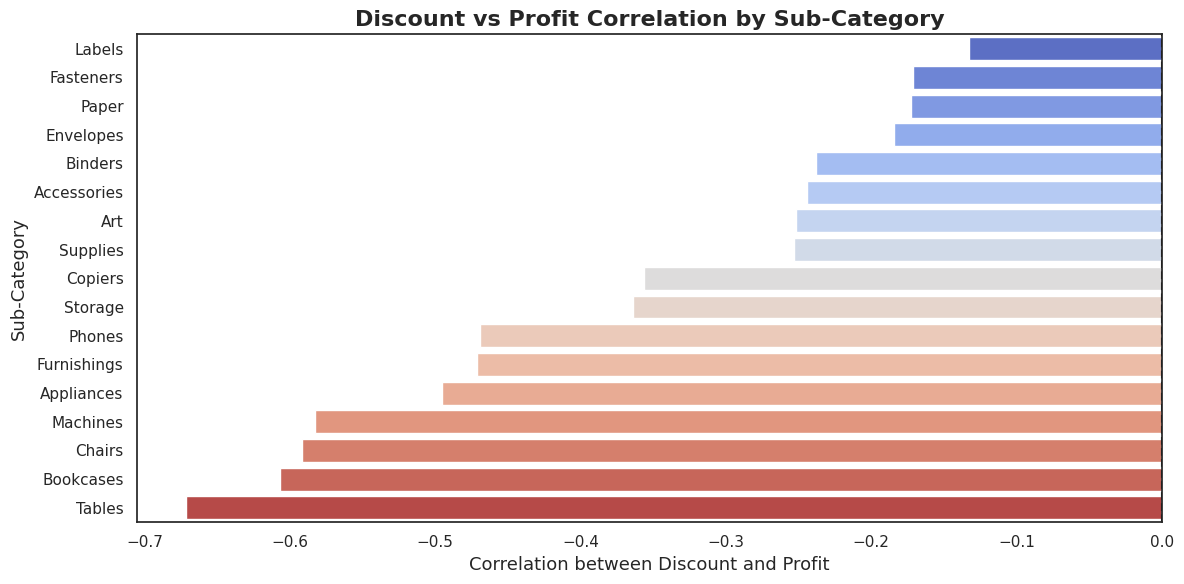

In [ ]:
# Set theme
sns.set_theme(style="white")

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=discount_profit_corr,
    x='Discount-Profit Correlation',
    y='Sub-Category',
    palette='coolwarm',
    orient='h'
)

# Titles and labels
plt.title('Discount vs Profit Correlation by Sub-Category', fontsize=16, weight='bold')
plt.xlabel('Correlation between Discount and Profit', fontsize=13)
plt.ylabel('Sub-Category', fontsize=13)

# Add vertical line at 0 for clarity
plt.axvline(0, color='black', linestyle='--')

plt.tight_layout()
plt.show()


Bussiness insight:

1. High-priced items lose profit fast.
Tables, Chairs, and Appliances show strong negative correlation — discounts sharply cut into profit. Avoid heavy discounting here.

2. Low-cost items handle discounts well.
Labels, Fasteners, and Paper have little impact on profit from discounts. Use promotions to boost volume.

3. Mid-range items need moderation.
Phones and Storage show moderate sensitivity. Use discounts carefully, like limited-time or bundled offers.

4. Discounts should be category-specific.
Uniform discounting risks profit loss. Tailor strategy by product type to protect margins and drive smart sales.

## 14. What are the relationships between key numerical variables?

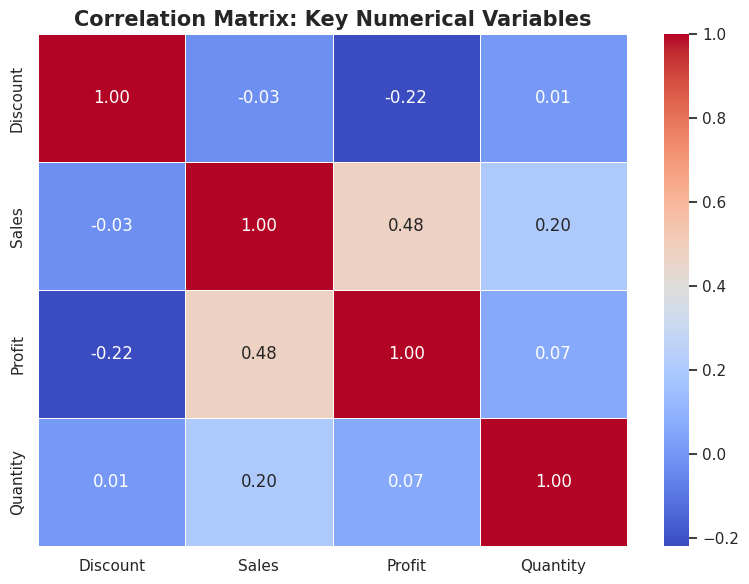

In [ ]:
#14.	What are the relationships between key numerical variables?
# Select relevant numerical columns
corr_df = df[['Discount', 'Sales', 'Profit', 'Quantity']]

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Key Numerical Variables', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

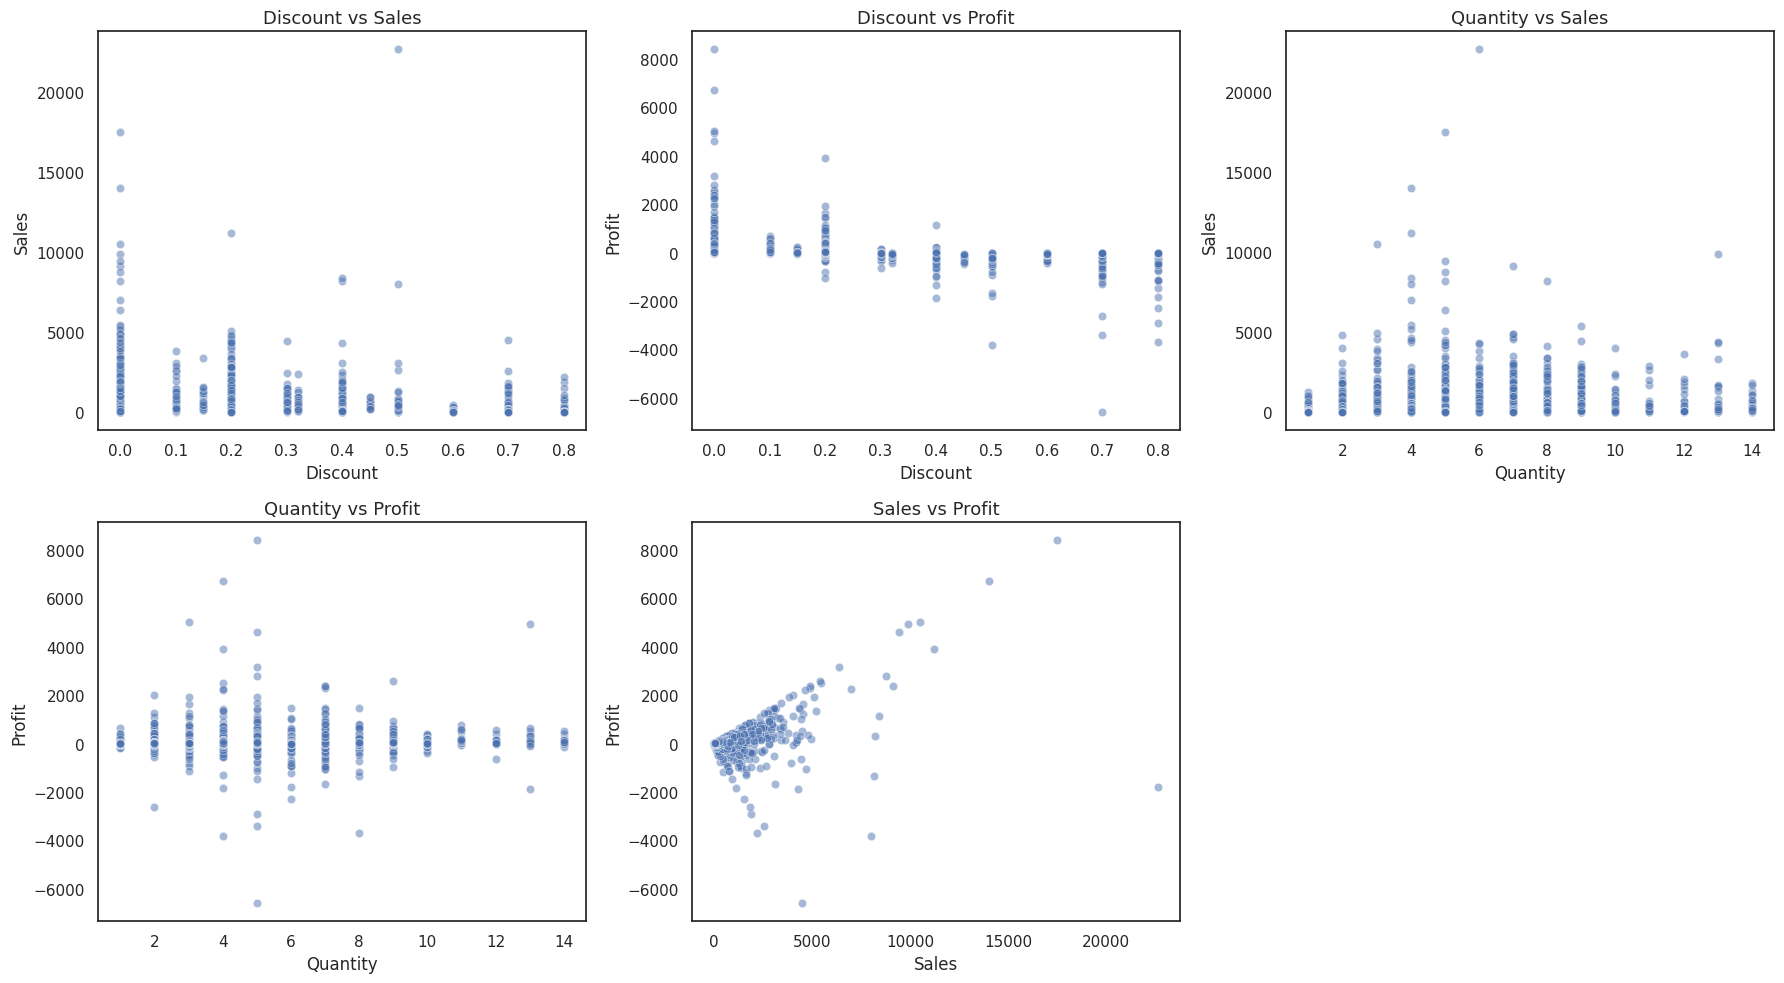

In [ ]:
# Create a 2x3 grid for scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Variable pairs to plot
pairs = [
    ('Discount', 'Sales'),
    ('Discount', 'Profit'),
    ('Quantity', 'Sales'),
    ('Quantity', 'Profit'),
    ('Sales', 'Profit')
]

# Plot each pair
for ax, (x, y) in zip(axes.flatten(), pairs):
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5, ax=ax)
    ax.set_title(f'{x} vs {y}', fontsize=13)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Remove unused subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


**1.Discount vs Profit → Negative Relationship**
Correlation: -0.22

Scatter Plot Observation: As discount increases, profit generally decreases. Some discounts lead to significant losses, especially beyond 40%.

Business Implication:
Offering high discounts may erode profit margins. While it can help move inventory, it's hurting the bottom line. Discounts should be strategically limited, ideally under 20%, where loss is minimized or positive profit is still achievable.

**2.Sales vs Profit → Moderately Positive Relationship**
Correlation: 0.48

Scatter Plot Observation: Higher sales tend to correlate with higher profit, but not always. There are cases of high sales with negative profit, possibly due to deep discounts or low-margin products.

Business Implication:
Focus should be on high-value products with healthy margins, not just volume. More sales don’t always mean more profit — quality of sales matters more than quantity.

**3.Quantity vs Profit → Weak Positive Relationship**
Correlation: 0.07

Scatter Plot Observation: Quantity doesn’t have a clear trend with profit. Large orders may still result in losses, depending on other factors like discount level.

Business Implication:
Encouraging bulk purchases alone won’t drive profit. It's important to control discounts and ensure that bulk orders are profitable

**4.Quantity vs Sales → Weak Positive Relationship**
Correlation: 0.20

Scatter Plot Observation: More items generally lead to higher sales, which is expected. However, the relationship is not strong.

Business Implication:
Increasing quantity can boost revenue but may not be enough on its own. Promotions encouraging larger purchases should be paired with carefully managed discount levels.

**5.Discount vs Sales → Almost No Correlation**
Correlation: -0.03

Scatter Plot Observation: Discount has little to no direct impact on sales — increasing discount doesn’t guarantee higher sales.

Business Implication:
Heavily discounting products might not increase sales significantly, but will definitely reduce profit. Better to optimize pricing or use targeted promotions instead of across-the-board discounting.

1
